# 📊 Exploratory Data Visualization for Customer Insights  
### Math for Machine Learning — Linear Algebra Applications

This notebook explores three related datasets—**Customer Demographics**, **Customer Transactions**, and **Social Media Interactions**—to visualize key patterns and relationships that form the foundation for linear algebra–based analysis.

The goal of this notebook is to **understand the structure of our data matrices** before applying machine learning or dimensionality reduction techniques like **Principal Component Analysis (PCA)** or **Singular Value Decomposition (SVD)**.  
Each dataset represents a different view of the same population:

1. **Demographics Dataset:** Contains personal attributes such as age, gender, income level, and signup date.  
   - Focus: Distributions, group comparisons, and trends over time.  

2. **Transactions Dataset:** Records spending behavior, product categories, and payment methods.  
   - Focus: Revenue distribution, customer concentration (Pareto analysis), and PCA for spending patterns.  

3. **Social Interactions Dataset:** Captures engagement across platforms and sentiment.  
   - Focus: Sentiment analysis, activity trends, and PCA on engagement styles.  

Throughout this notebook, we apply **core Linear Algebra principles** to data exploration:
- Representing datasets as **matrices**, where rows correspond to customers and columns correspond to features or interaction types.  
- Using **correlation matrices** to identify linear relationships between numerical features.  
- Applying **PCA** and **SVD** to find dominant directions of variance—revealing hidden structures in customer behavior.

Each visualization below is crafted to **bridge data analysis with mathematical intuition**, helping us understand not just what the data shows, but how its structure can be described and manipulated algebraically.  
Let’s begin exploring these datasets and see how mathematics translates into real-world insights!

## A) DEMOGRAPHICS — distributions & groups

In [2]:
# DEMO-SETUP
import pandas as pd, numpy as np, matplotlib.pyplot as plt

demo = pd.read_csv("cleaned_customer_demographics.csv")
demo["signup_date"] = pd.to_datetime(demo["signup_date"], errors="coerce")

print(demo.dtypes)
print(demo.head(3))

customer_id             object
age                    float64
gender                  object
location                object
income_level            object
signup_date     datetime64[ns]
dtype: object
                            customer_id   age  gender    location  \
0  9207fa75-5758-48d1-94ad-19c041e0520f  51.0  Female  Jensenberg   
1  50118139-7264-428f-81cc-a25fddc5d6dd  44.0    Male   Port Carl   
2  7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4  50.0  Female   Jessebury   

  income_level signup_date  
0          Low  2022-11-17  
1       Medium  2024-06-10  
2         High  2023-08-24  


### A1. Age distribution (skew/spread)

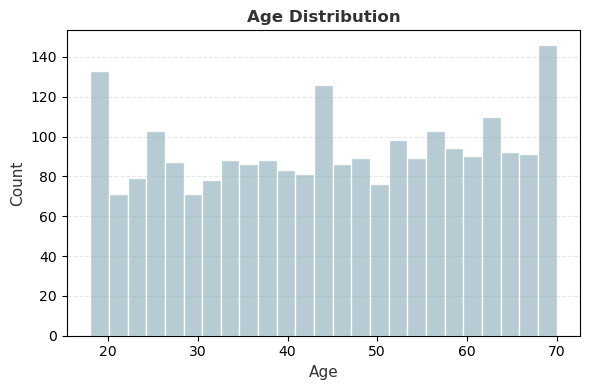

In [27]:
import matplotlib.pyplot as plt

def pretty_age_histogram(df, value_col="age", bins=25):
    """
    A clean, aesthetic histogram for age distribution.
    """
    plt.figure(figsize=(6,4))
    plt.hist(df[value_col].dropna(),
             bins=bins,
             color="#AEC6CF",         # soft pastel blue
             edgecolor="white",       # clean white edges
             alpha=0.9)

    plt.title("Age Distribution", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Age", fontsize=11, color="#333333")
    plt.ylabel("Count", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_age_histogram(demo, "age")


### A2. Age by gender (boxplot)

C:\Users\nicol\AppData\Local\Temp\ipykernel_6204\2640214488.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data,


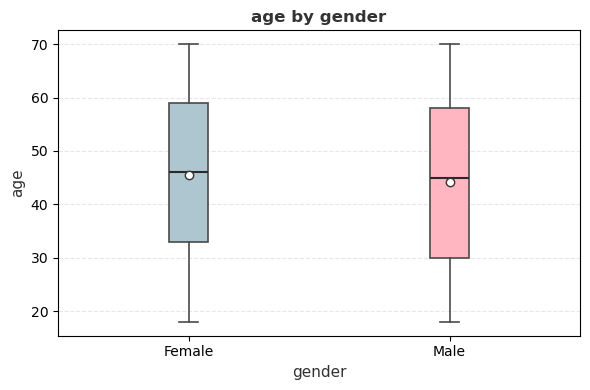

In [25]:
import matplotlib.pyplot as plt

def pretty_box_by_group(df, value_col, group_col):
    """
    Simple and aesthetic boxplot with soft color and clean formatting.
    """
    grouped = df.groupby(group_col)[value_col].apply(list).dropna()
    labels = grouped.index.tolist()
    data = grouped.values

    plt.figure(figsize=(6,4))
    box = plt.boxplot(data,
                      labels=labels,
                      patch_artist=True,
                      showmeans=True,
                      meanline=False,
                      boxprops=dict(linewidth=1.2, color="#4a4a4a"),
                      medianprops=dict(color="#2a2a2a", linewidth=1.5),
                      meanprops=dict(marker='o', markerfacecolor='white', 
                                     markeredgecolor='#333333', markersize=6),
                      whiskerprops=dict(color="#4a4a4a", linewidth=1.2),
                      capprops=dict(color="#4a4a4a", linewidth=1.2))

    # Soft pastel fill colors 💅
    colors = ["#AEC6CF", "#FFB6C1", "#FFDAB9", "#B3E6B3", "#E6B3E6"]
    for patch, color in zip(box["boxes"], colors[:len(data)]):
        patch.set_facecolor(color)

    plt.title(f"{value_col} by {group_col}", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel(group_col, fontsize=11, color="#333333")
    plt.ylabel(value_col, fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
if "gender" in demo.columns:
    pretty_box_by_group(demo, "age", "gender")

### A3. Signup trend (monthly new customers)

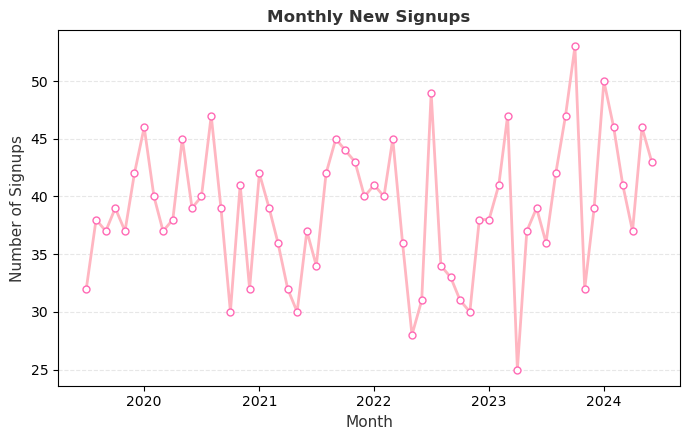

In [28]:
import matplotlib.pyplot as plt

def pretty_monthly_signups(df, date_col="signup_date", id_col="customer_id"):
    """
    Clean and aesthetic line chart for monthly new signups.
    """
    if date_col not in df.columns:
        print(f"Column '{date_col}' not found in dataframe.")
        return

    # convert to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # resample monthly
    monthly = df.set_index(date_col).resample("MS")[id_col].count()

    # plot
    plt.figure(figsize=(7,4.5))
    plt.plot(monthly.index, monthly.values,
             color="#FFB6C1",      # soft pastel pink
             linewidth=2,
             marker="o",
             markersize=5,
             markerfacecolor="white",
             markeredgecolor="#FF69B4")  # light pink highlight

    plt.title("Monthly New Signups", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Month", fontsize=11, color="#333333")
    plt.ylabel("Number of Signups", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_monthly_signups(demo, "signup_date", "customer_id")

## B) TRANSACTIONS — revenue, categories, Pareto, PCA on preferences

In [9]:
txn = pd.read_csv("cleaned_customer_transactions.csv")
txn["transaction_date"] = pd.to_datetime(txn["transaction_date"], errors="coerce")

print(txn.dtypes)
print(txn.head(3))

customer_id                 object
transaction_id              object
transaction_date    datetime64[ns]
amount                     float64
product_category            object
payment_method              object
is_refund                     bool
dtype: object
                            customer_id                        transaction_id  \
0  60567026-f719-4cd6-849e-137e86d8938f  5ff75116-0a50-4d04-80fb-31e5ccbb0769   
1  4090ba85-b111-4f75-a792-c777965f5255  2c39b9fe-ff57-4d39-9321-9f5cdf187aa1   
2  9223891b-73ff-4d5c-b8ae-13ece82ee28b  f79588dd-3db9-4ffa-97f8-7de0e64259f1   

  transaction_date  amount product_category payment_method  is_refund  
0       2024-05-15  117.64         Clothing         Paypal      False  
1       2023-04-26  466.14  Health & Beauty  Bank Transfer      False  
2       2022-09-23  563.99         Clothing     Debit Card      False  


### B1. Distribution of transaction amounts

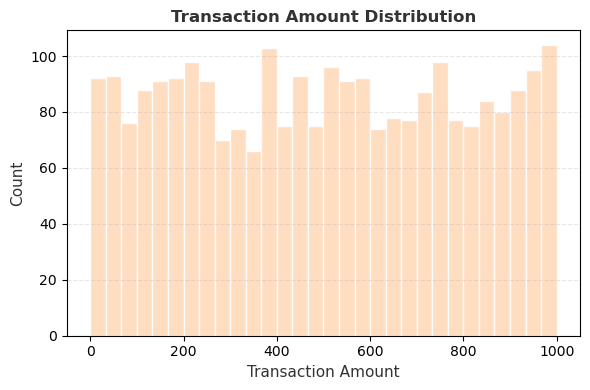

In [29]:
import matplotlib.pyplot as plt

def pretty_transaction_histogram(df, value_col="amount", bins=30):
    """
    A clean, pastel-themed histogram for transaction amount distribution.
    """
    plt.figure(figsize=(6,4))
    plt.hist(df[value_col].dropna(),
             bins=bins,
             color="#FFDAB9",          # soft peach color
             edgecolor="white",        # clean white edges for elegance
             alpha=0.9)

    plt.title("Transaction Amount Distribution", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Transaction Amount", fontsize=11, color="#333333")
    plt.ylabel("Count", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_transaction_histogram(txn, "amount")

### B5. Pareto curve (customer concentration of revenue)

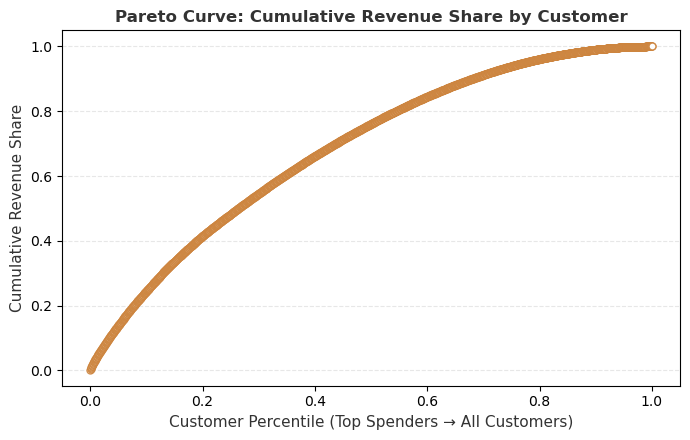

Share of revenue from top 20% customers: 41.43%


In [30]:
import matplotlib.pyplot as plt
import numpy as np

def pretty_pareto_curve(df, amount_col="amount", id_col="customer_id", refund_col="is_refund"):
    """
    Aesthetic Pareto curve showing cumulative revenue share by customer.
    """

    # filter out refunded transactions
    cust_rev = df[~df[refund_col]].groupby(id_col)[amount_col].sum().sort_values(ascending=False)

    # compute cumulative share
    cum_share = cust_rev.cumsum() / cust_rev.sum()
    x = np.arange(1, len(cust_rev)+1) / len(cust_rev)

    # plot
    plt.figure(figsize=(7,4.5))
    plt.plot(x, cum_share.values,
             color="#F4A460",          # warm sandy gold tone
             linewidth=2.5,
             marker="o",
             markersize=5,
             markerfacecolor="white",
             markeredgecolor="#CD853F",  # slightly deeper gold for accent
             alpha=0.9)

    # styling
    plt.title("Pareto Curve: Cumulative Revenue Share by Customer",
              fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Customer Percentile (Top Spenders → All Customers)",
               fontsize=11, color="#333333")
    plt.ylabel("Cumulative Revenue Share", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # print the 80/20 insight
    top_20_share = cum_share.iloc[int(0.2*len(cum_share))-1]
    print(f"Share of revenue from top 20% customers: {top_20_share:.2%}")

# example call
pretty_pareto_curve(txn, "amount", "customer_id", "is_refund")

### B3. PCA on customer × product_category spend (preference structure)

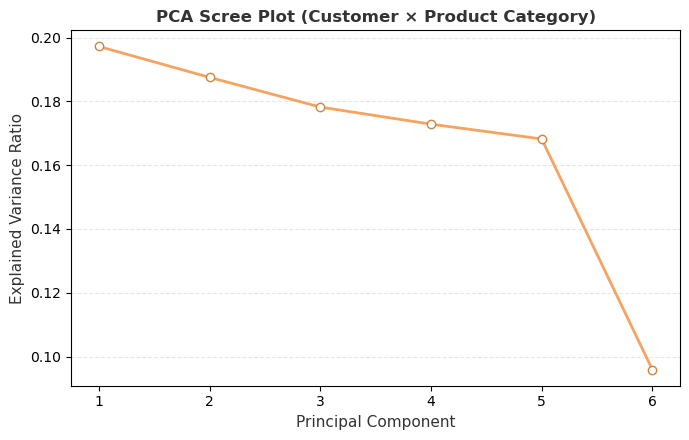

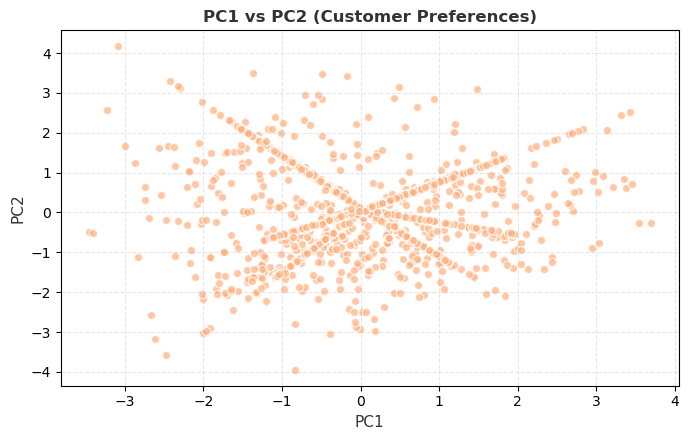

,PC1,PC2,PC3,PC4,PC5,PC6
product_category,,,,,,
Home & Garden,0.540360,0.390107,-0.270053,0.069448,-0.536995,0.435559
Automotive,-0.475865,0.626425,0.306861,-0.132998,0.194827,0.480973
Nan,0.399805,-0.125732,-0.265562,-0.455583,0.658241,0.336134
Clothing,-0.340784,-0.517594,-0.022838,-0.504772,-0.452234,0.395133
Electronics,-0.339091,-0.205105,-0.548243,0.607179,0.171963,0.379660
Health & Beauty,0.301003,-0.360039,0.679185,0.382716,0.079436,0.407057


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def pretty_pca_visuals(txn, id_col="customer_id", cat_col="product_category", value_col="amount"):
    """
    Aesthetic PCA visuals for Customer × Product Category matrix.
    """

    # Build matrix (customers × product categories)
    mat = txn.pivot_table(index=id_col, columns=cat_col,
                          values=value_col, aggfunc="sum", fill_value=0)

    # Standardize data
    scaler = StandardScaler()
    Xz = scaler.fit_transform(mat)

    # Run PCA
    pca = PCA()
    Z = pca.fit_transform(Xz)

    # Scree Plot 🌸
    plt.figure(figsize=(7,4.5))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
             pca.explained_variance_ratio_,
             color="#F4A460",          # warm sandy gold
             marker="o",
             markersize=6,
             markerfacecolor="white",
             markeredgecolor="#CD853F",
             linewidth=2)
    plt.title("PCA Scree Plot (Customer × Product Category)",
              fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Principal Component", fontsize=11, color="#333333")
    plt.ylabel("Explained Variance Ratio", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2D Projection 🌷
    plt.figure(figsize=(7,4.5))
    plt.scatter(Z[:,0], Z[:,1],
                color="#FFB07C",       # soft coral
                edgecolor="white",
                alpha=0.7,
                s=35)
    plt.title("PC1 vs PC2 (Customer Preferences)",
              fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("PC1", fontsize=11, color="#333333")
    plt.ylabel("PC2", fontsize=11, color="#333333")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Feature Loadings
    loadings = pd.DataFrame(pca.components_.T,
                            index=mat.columns,
                            columns=[f"PC{i+1}" for i in range(len(mat.columns))])
    return loadings.sort_values("PC1", key=np.abs, ascending=False).head(10)

# example call
loadings = pretty_pca_visuals(txn)
loadings

### B4. Monthly Revenue (Refunds Excluded)

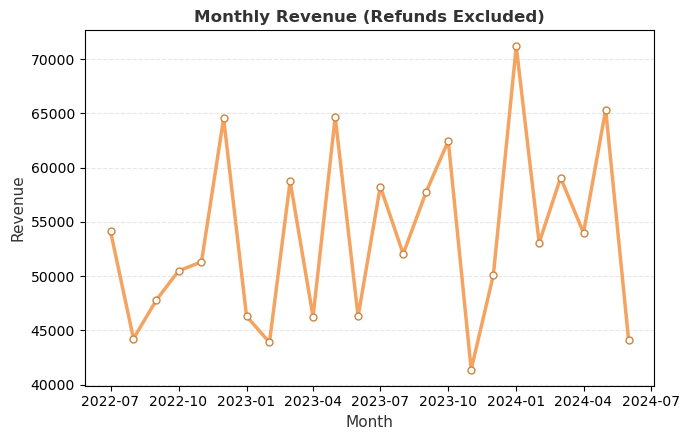

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

def pretty_monthly_revenue(txn, date_col="transaction_date", amount_col="amount", refund_col="is_refund"):
    """
    Clean, aesthetic monthly revenue line chart (refunds excluded).
    """
    # ensure datetime
    txn = txn.copy()
    txn[date_col] = pd.to_datetime(txn[date_col], errors="coerce")

    # monthly revenue (exclude refunds)
    monthly_rev = (
        txn.loc[~txn[refund_col]]
           .set_index(date_col)
           .resample("MS")[amount_col]
           .sum()
    )

    # plot
    plt.figure(figsize=(7,4.5))
    plt.plot(
        monthly_rev.index, monthly_rev.values,
        color="#F4A460",           # warm sandy gold
        linewidth=2.5,
        marker="o",
        markersize=5,
        markerfacecolor="white",
        markeredgecolor="#CD853F"  # deeper gold accent
    )
    plt.title("Monthly Revenue (Refunds Excluded)", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Month", fontsize=11, color="#333333")
    plt.ylabel("Revenue", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_monthly_revenue(txn)

### C) SOCIAL INTERACTIONS — activity, sentiment mix, weekly patterns, PCA

In [17]:
social = pd.read_csv("cleaned_social_media_interactions.csv")
social["interaction_date"] = pd.to_datetime(social["interaction_date"], errors="coerce")

print(social.dtypes)
print(social.head(3))


customer_id                 object
interaction_id              object
interaction_date    datetime64[ns]
platform                    object
interaction_type            object
sentiment                   object
dtype: object
                            customer_id                        interaction_id  \
0  08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2  a83fa04c-f109-4f24-8ce1-2078154f6a1c   
1  efdfdfc9-5dbb-4478-911a-101a390a0285  28a69c4b-a2e4-4c74-a130-1132d7733fdf   
2  3e44871b-f56c-4576-b1ca-d1dc999e2166  0c409883-8396-48e4-83fb-887329848696   

  interaction_date   platform interaction_type sentiment  
0       2024-05-24  Instagram          Comment   Neutral  
1       2023-11-01  Instagram             Like   Neutral  
2       2023-12-18  Instagram          Comment  Positive  


### C1. Sentiment distribution overall (bar)

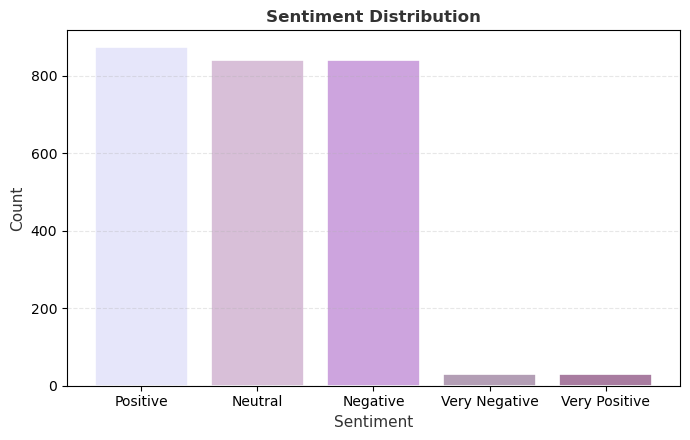

In [33]:
import matplotlib.pyplot as plt

def pretty_sentiment_bar(social, sentiment_col="sentiment"):
    """
    Clean, aesthetic bar chart for sentiment distribution.
    """
    # sentiment counts
    counts = social[sentiment_col].value_counts()

    # define pastel violet palette 💜
    colors = ["#E6E6FA", "#D8BFD8", "#CDA4DE", "#B39EB5", "#A87CA0"][:len(counts)]

    plt.figure(figsize=(7,4.5))
    plt.bar(counts.index, counts.values, color=colors, edgecolor="white", linewidth=1.2)

    # styling
    plt.title("Sentiment Distribution", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Sentiment", fontsize=11, color="#333333")
    plt.ylabel("Count", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_sentiment_bar(social, "sentiment")

### C2. Activity by weekday

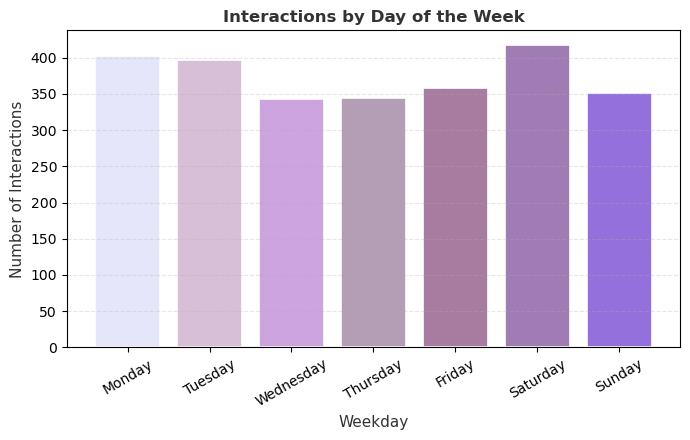

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

def pretty_weekday_activity(social, date_col="interaction_date"):
    """
    Aesthetic bar chart showing interactions by day of the week.
    """
    # Ensure datetime conversion
    social = social.copy()
    social[date_col] = pd.to_datetime(social[date_col], errors="coerce")

    # Extract weekday names
    social["weekday"] = social[date_col].dt.day_name()

    # Order weekdays properly
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    wk = social["weekday"].value_counts().reindex(order)

    # Define pastel violet gradient 💜
    colors = ["#E6E6FA", "#D8BFD8", "#CDA4DE", "#B39EB5", "#A87CA0", "#9F7CB3", "#9370DB"]

    plt.figure(figsize=(7,4.5))
    plt.bar(wk.index, wk.values, color=colors[:len(wk)], edgecolor="white", linewidth=1.2)

    # styling
    plt.title("Interactions by Day of the Week", fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Weekday", fontsize=11, color="#333333")
    plt.ylabel("Number of Interactions", fontsize=11, color="#333333")
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# example call
pretty_weekday_activity(social, "interaction_date")

### C3. PCA on customer × interaction_type counts (engagement style)

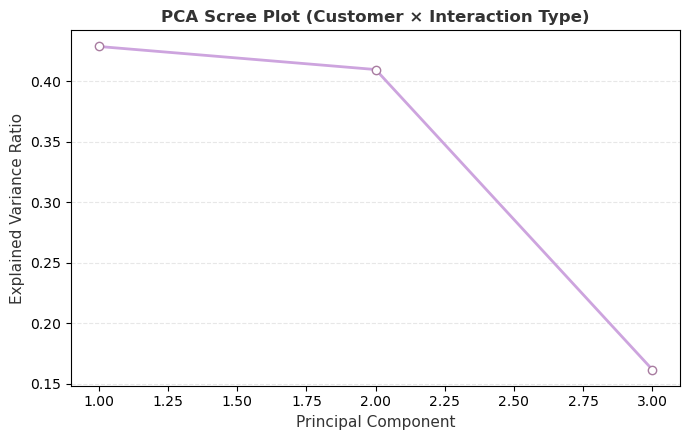

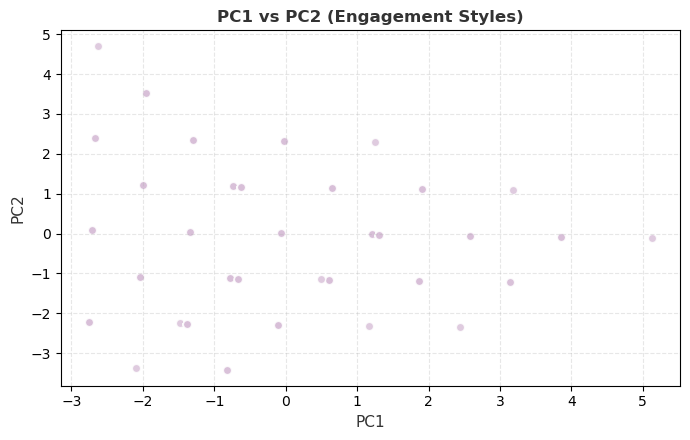

,PC1,PC2,PC3
interaction_type,,,
Comment,0.801625,-0.017170,0.597581
Like,-0.438249,-0.696751,0.567869
Share,-0.406615,0.717107,0.566058


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def pretty_social_pca(social, id_col="customer_id", type_col="interaction_type", value_col="interaction_id"):
    """
    Aesthetic PCA visualizations for customer × interaction type matrix.
    """

    # Pivot table (customers × interaction types)
    cust_type = social.pivot_table(index=id_col, columns=type_col,
                                   values=value_col, aggfunc="count", fill_value=0)

    # Standardize features
    scaler = StandardScaler()
    Xz = scaler.fit_transform(cust_type)

    # Perform PCA
    pca = PCA()
    Z = pca.fit_transform(Xz)

    # 🌸 Scree Plot (variance explained)
    plt.figure(figsize=(7,4.5))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
             pca.explained_variance_ratio_,
             color="#CDA4DE",           # soft lavender
             marker="o",
             markersize=6,
             markerfacecolor="white",
             markeredgecolor="#A87CA0",  # deeper violet accent
             linewidth=2)
    plt.title("PCA Scree Plot (Customer × Interaction Type)",
              fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("Principal Component", fontsize=11, color="#333333")
    plt.ylabel("Explained Variance Ratio", fontsize=11, color="#333333")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 💜 2D PCA Projection (Engagement Styles)
    plt.figure(figsize=(7,4.5))
    plt.scatter(Z[:,0], Z[:,1],
                color="#D8BFD8",          # light lilac
                edgecolor="white",
                alpha=0.8,
                s=35)
    plt.title("PC1 vs PC2 (Engagement Styles)",
              fontsize=12, fontweight='semibold', color="#333333")
    plt.xlabel("PC1", fontsize=11, color="#333333")
    plt.ylabel("PC2", fontsize=11, color="#333333")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 🪞 Loadings (features contributing to PC1)
    loadings = pd.DataFrame(pca.components_.T,
                            index=cust_type.columns,
                            columns=[f"PC{i+1}" for i in range(len(cust_type.columns))])
    return loadings.sort_values("PC1", key=abs, ascending=False).head(10)

# example call
loadings = pretty_social_pca(social)
loadings